In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", sep=";")

In [3]:
df["Time"] = pd.to_datetime(df["Time"], format='%m/%d/%y %H:%M')

In [4]:
df["Date"] = df["Time"].dt.date

In [5]:
print("Información general del DataFrame:")
print(df.info())
print("\nPrimeras filas del DataFrame:")
print(df.head())

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25912 entries, 0 to 25911
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      25912 non-null  datetime64[ns]
 1   OrderID   25912 non-null  int64         
 2   ItemID    25912 non-null  int64         
 3   MenuItem  25912 non-null  object        
 4   Side 1    25912 non-null  object        
 5   Side 2    7245 non-null   object        
 6   Date      25912 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB
None

Primeras filas del DataFrame:
                 Time  OrderID  ItemID                     MenuItem  \
0 2024-10-06 10:11:00        1       1         Small Platter - Ribs   
1 2024-10-06 10:11:00        1       2       Sandwich - Pulled Pork   
2 2024-10-06 10:15:00        2       1           Sandwich - Brisket   
3 2024-10-06 10:15:00        2       2  Small Platter 

In [6]:
print("\nValores únicos en 'MenuItem':")
unique_menuitems = df["MenuItem"].unique()
print(unique_menuitems)

print("\nValores únicos en 'Side 1':")
unique_side1 = df["Side 1"].dropna().unique()
print(unique_side1)

print("\nValores únicos en 'Side 2':")
unique_side2 = df["Side 2"].dropna().unique()
print(unique_side2)


Valores únicos en 'MenuItem':
['Small Platter - Ribs' 'Sandwich - Pulled Pork' 'Sandwich - Brisket'
 'Small Platter - Pulled Pork' 'Small Platter - Brisket'
 'Large Platter - Pulled Pork' 'Large Platter - Ribs'
 'Large Platter - Brisket']

Valores únicos en 'Side 1':
['Green Beans' 'Fries' 'Baked Beans' 'Mac and Cheese']

Valores únicos en 'Side 2':
['Mac and Cheese' 'Baked Beans' 'Green Beans' 'Fries']


In [7]:
pedidos_por_dia = df.groupby("Date").size()
min_pedidos = pedidos_por_dia.min()
max_pedidos = pedidos_por_dia.max()
print("\nPedidos diarios:")
print(pedidos_por_dia)
print(f"\nMínimo de pedidos en un día: {min_pedidos}")
print(f"Máximo de pedidos en un día: {max_pedidos}")


Pedidos diarios:
Date
2024-10-06     925
2024-10-07     846
2024-10-08     892
2024-10-09     915
2024-10-10     974
2024-10-11     835
2024-10-12     889
2024-10-13     886
2024-10-14     925
2024-10-15     889
2024-10-16     894
2024-10-17     936
2024-10-18     992
2024-10-19     898
2024-10-20     940
2024-10-21     972
2024-10-22     898
2024-10-23     953
2024-10-24     876
2024-10-25     982
2024-10-26     997
2024-10-27     882
2024-10-28     980
2024-10-29     925
2024-10-30     931
2024-10-31    1020
2024-11-01     869
2024-11-02     991
dtype: int64

Mínimo de pedidos en un día: 835
Máximo de pedidos en un día: 1020


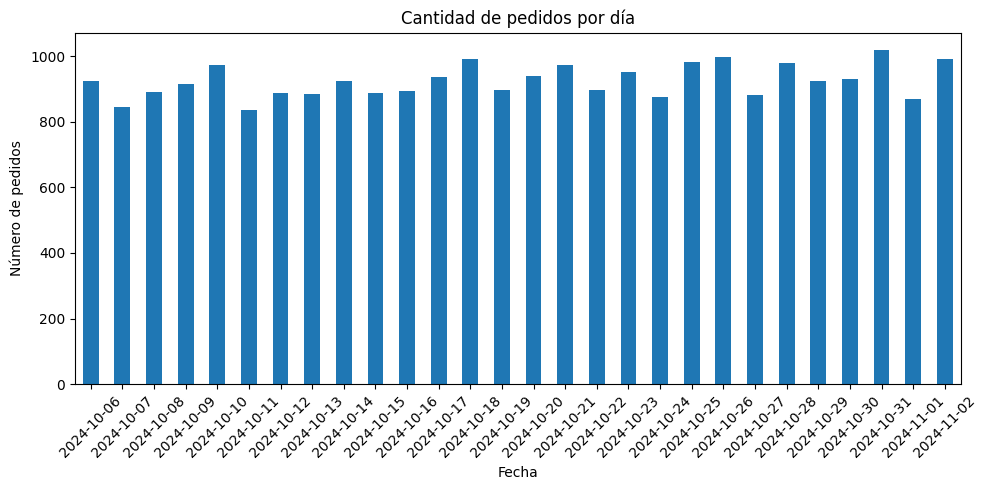

In [8]:
plt.figure(figsize=(10, 5))
pedidos_por_dia.plot(kind="bar")
plt.title("Cantidad de pedidos por día")
plt.xlabel("Fecha")
plt.ylabel("Número de pedidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
menuitem_counts = df["MenuItem"].value_counts()
print("\nCantidad de pedidos por 'MenuItem':")
print(menuitem_counts)


Cantidad de pedidos por 'MenuItem':
MenuItem
Sandwich - Pulled Pork         5226
Sandwich - Brisket             4260
Small Platter - Pulled Pork    3820
Large Platter - Pulled Pork    3234
Small Platter - Ribs           2902
Small Platter - Brisket        2459
Large Platter - Brisket        2057
Large Platter - Ribs           1954
Name: count, dtype: int64


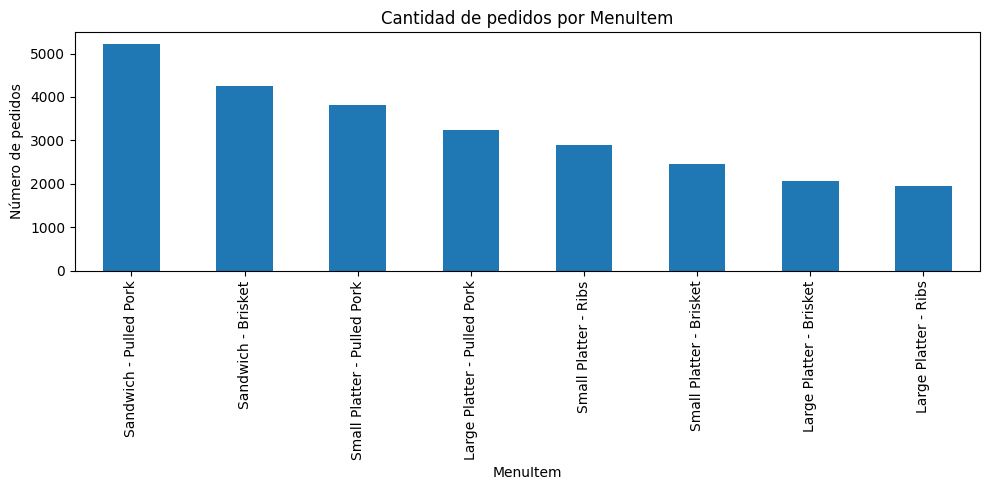

In [10]:
plt.figure(figsize=(10, 5))
menuitem_counts.plot(kind="bar")
plt.title("Cantidad de pedidos por MenuItem")
plt.xlabel("MenuItem")
plt.ylabel("Número de pedidos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
sides = df.melt(id_vars=["OrderID", "Time", "Date"], value_vars=["Side 1", "Side 2"],
                var_name="SideType", value_name="Side")
sides = sides[sides["Side"].notna() & (sides["Side"] != "")]
side_counts = sides["Side"].value_counts()
print("\nCantidad de pedidos por tipo de acompañamiento:")
print(side_counts)


Cantidad de pedidos por tipo de acompañamiento:
Side
Fries             12425
Mac and Cheese     8139
Green Beans        6663
Baked Beans        5930
Name: count, dtype: int64


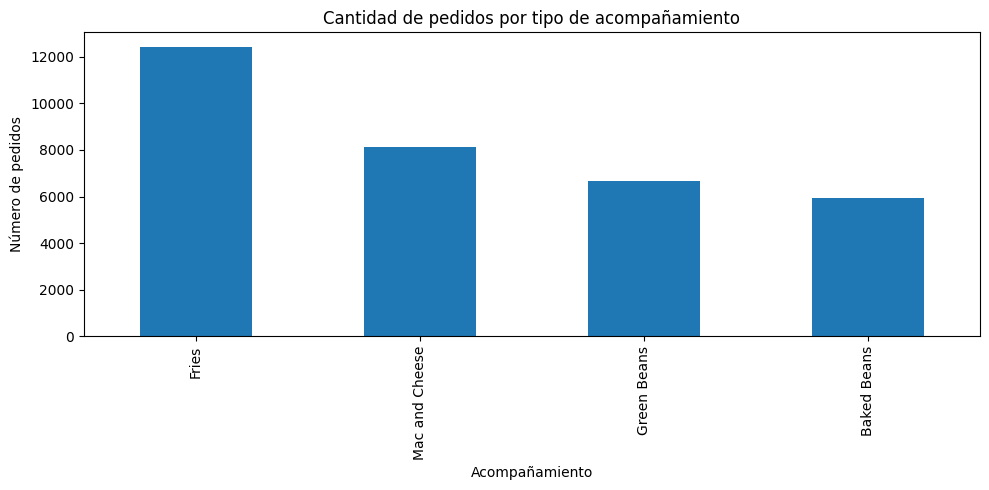

In [12]:
plt.figure(figsize=(10, 5))
side_counts.plot(kind="bar")
plt.title("Cantidad de pedidos por tipo de acompañamiento")
plt.xlabel("Acompañamiento")
plt.ylabel("Número de pedidos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
promedio_pedidos_diarios = pedidos_por_dia.mean()
print(f"\nPromedio de pedidos diarios: {promedio_pedidos_diarios:.2f}")


Promedio de pedidos diarios: 925.43


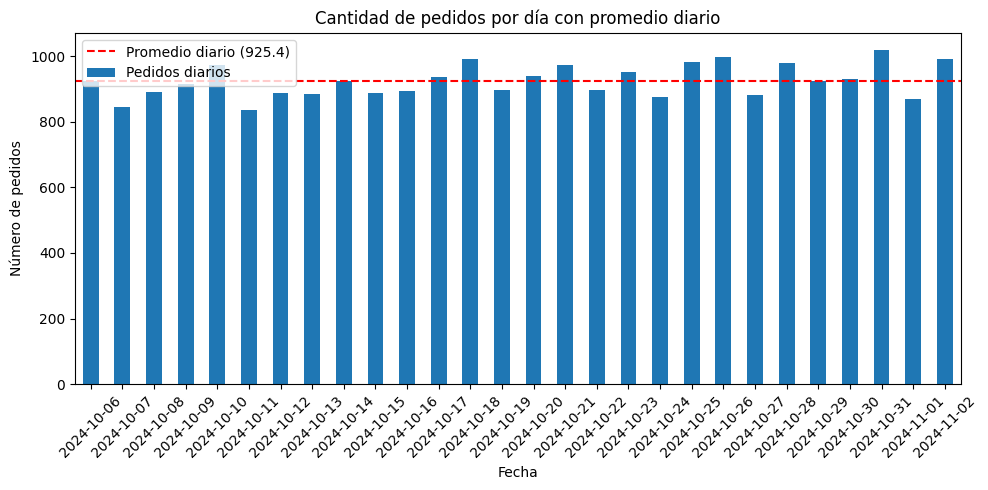

In [14]:
plt.figure(figsize=(10, 5))
pedidos_por_dia.plot(kind="bar", label="Pedidos diarios")
plt.axhline(promedio_pedidos_diarios, color="red", linestyle="--",
            label=f"Promedio diario ({promedio_pedidos_diarios:.1f})")
plt.title("Cantidad de pedidos por día con promedio diario")
plt.xlabel("Fecha")
plt.ylabel("Número de pedidos")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()